# **02 - Sale Price Study**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/Users/pieterkdevilliers/Desktop/Development/Code Institute/pp5-heritage-housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/Users/pieterkdevilliers/Desktop/Development/Code Institute/pp5-heritage-housing'

# Load Data

In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [6]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices_records.csv")
    )
df.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0     856.0     854.0           3.0           No       706.0          GLQ   
1    1262.0       0.0           3.0           Gd       978.0          ALQ   
2     920.0     866.0           3.0           Mn       486.0          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0      150.0            0.0       548.0          RFn  ...         65.0   
1      284.0            NaN       460.0          RFn  ...         80.0   
2      434.0            0.0       608.0          RFn  ...         68.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0       196.0        61.0          5.0          7.0        856.0         0.0   
1         0.0         0.0          8.0          6.0       1262.0         NaN   
2       162.0        42.0          5.0          7.0        920.0         NaN   

   YearBuilt  YearRemodAdd  SalePrice  
0       2003          2003   208500.0  
1       1976          1976   181500.0  
2       2001          2002   223500.0  

[3 rows x 24 columns]

---

# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [7]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/962869596.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation Study

Pearson and Spearman

## Pearson

In [8]:
df_corr = df.corr(method='pearson')
df_corr.filter(['SalePrice']).sort_values(by='SalePrice', key=abs, ascending=False)

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/1721449031.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method='pearson')


SalePrice
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
LotFrontage     0.351799
2ndFlrSF        0.322335
OpenPorchSF     0.315856
LotArea         0.263843
WoodDeckSF      0.252027
BsmtUnfSF       0.214479
EnclosedPorch  -0.176458
BedroomAbvGr    0.161901
OverallCond    -0.077856

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/1692775497.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


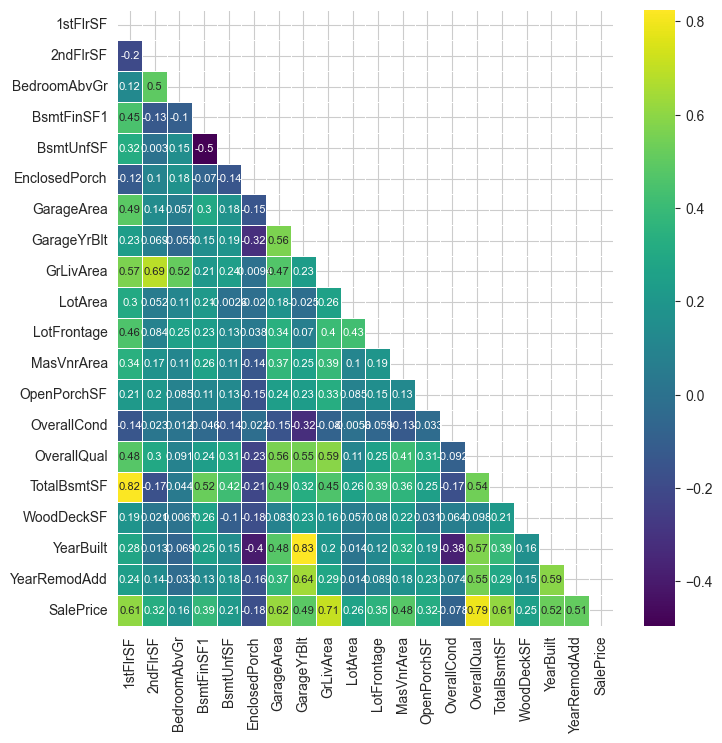

In [9]:
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, axes = plt.subplots(figsize=(8,8))
sns.heatmap(data=df_corr, annot=True, mask=mask, cmap='viridis', annot_kws={"size": 8}, linewidths=0.5)
plt.ylim(df_corr.shape[1], 0) # it sets the y axis limits
plt.show()

Plot Corr with certain threshold 0.4

In [10]:
def heatmap_corr(data, threshold, figsize=(8,8), annot_size=8):
  # we create the mask for the upper diagonal and
  # show only values greater than the threshold
  mask = np.zeros_like(data, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True
  mask[abs(data) < threshold] = True

  # we plot the heatmap as usual
  fig, axes = plt.subplots(figsize=(8,8))
  sns.heatmap(data=data, annot=True, xticklabels=True, yticklabels=True,
              mask=mask, cmap='viridis', annot_kws={"size": annot_size}, ax=axes,
              linewidth=0.5
                    )
  plt.ylim(len(data.columns),0)
  plt.show()

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/1162136471.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data, dtype=np.bool)


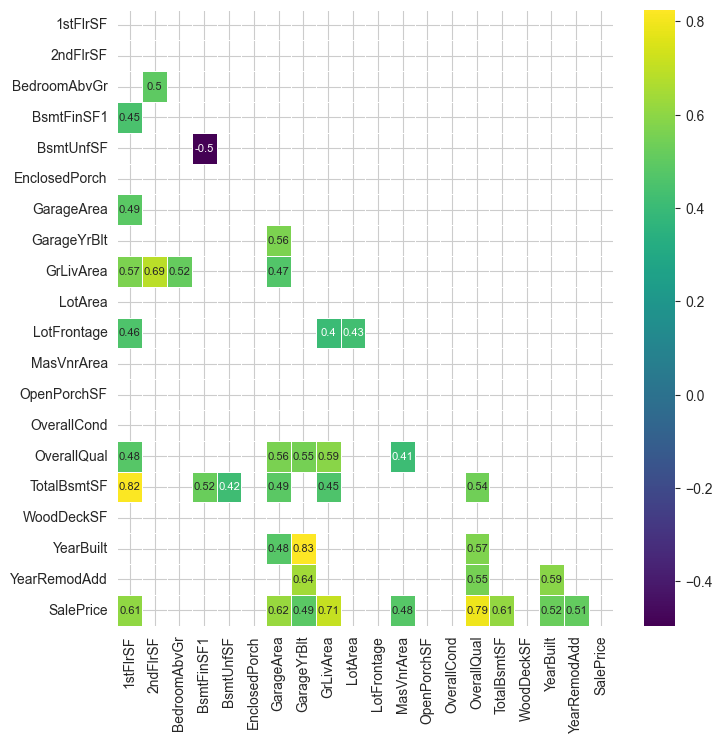

In [11]:
heatmap_corr(data= df_corr, threshold=0.4)

Only plot Corr above 0.6

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/1162136471.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data, dtype=np.bool)


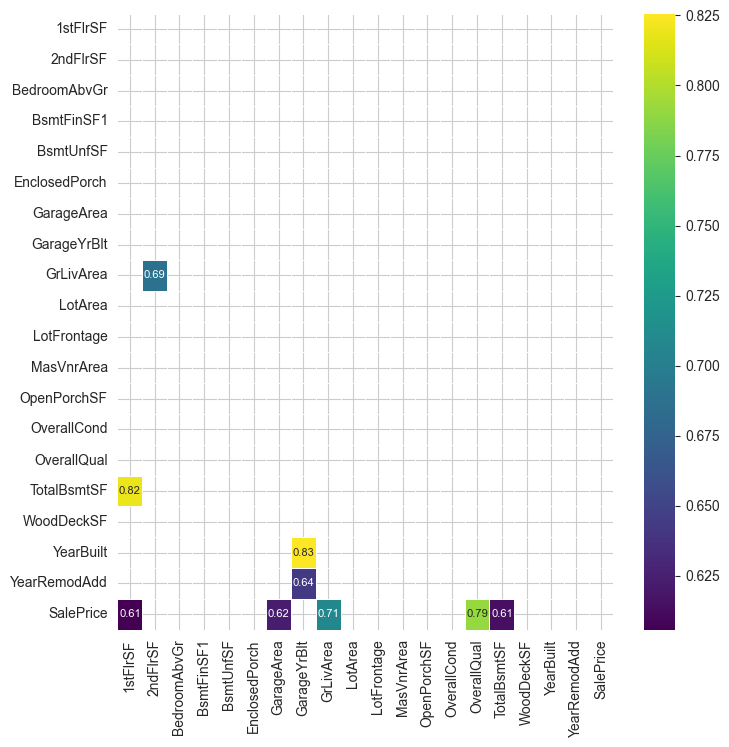

In [12]:
heatmap_corr(data= df_corr, threshold=0.6)

Scatterplot

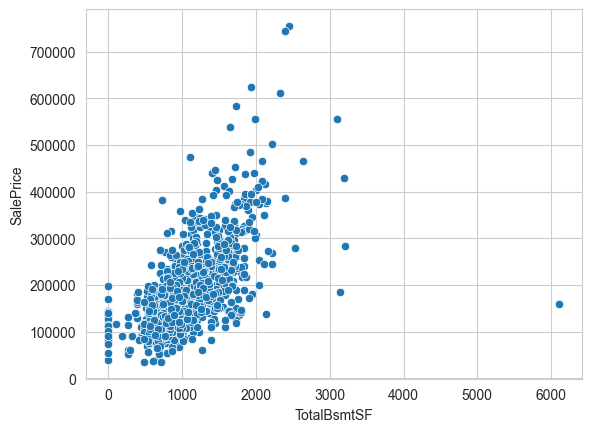

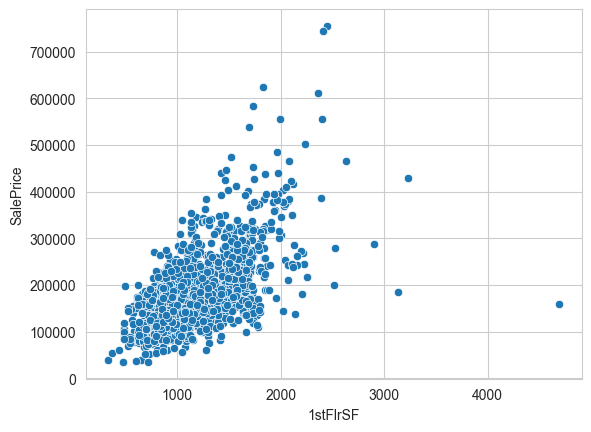

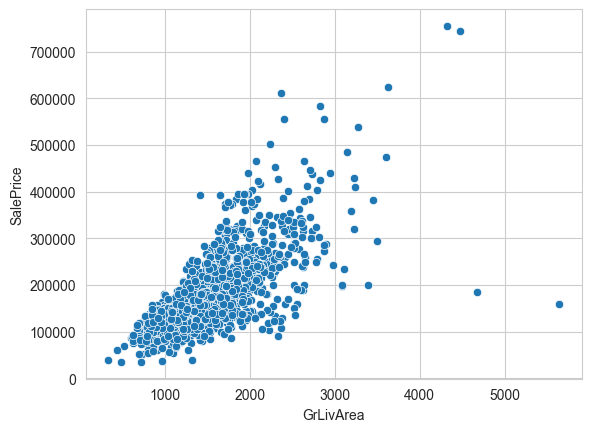

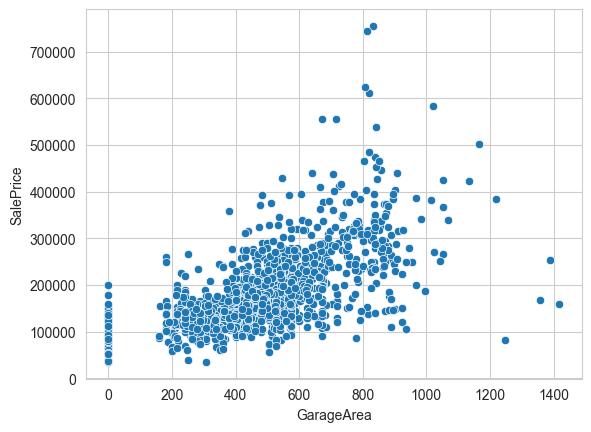

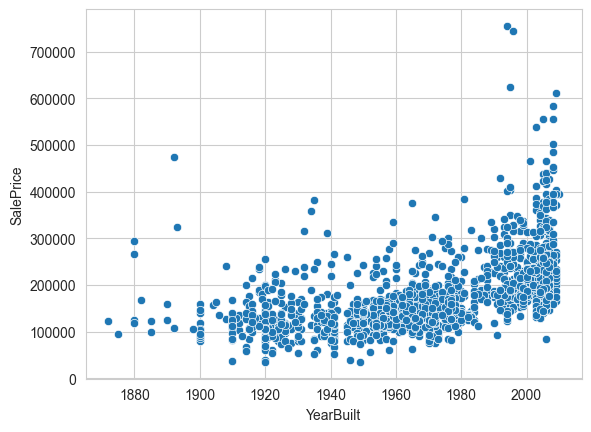

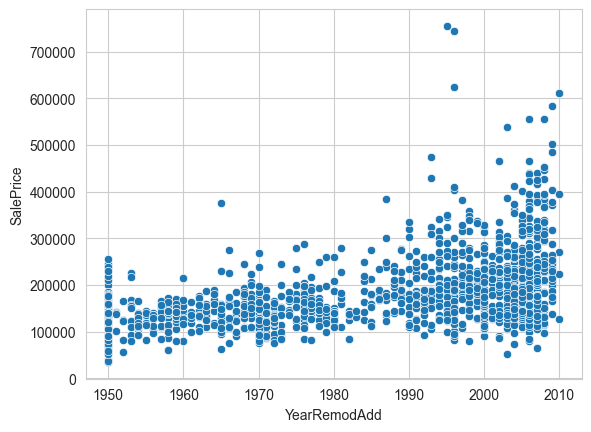

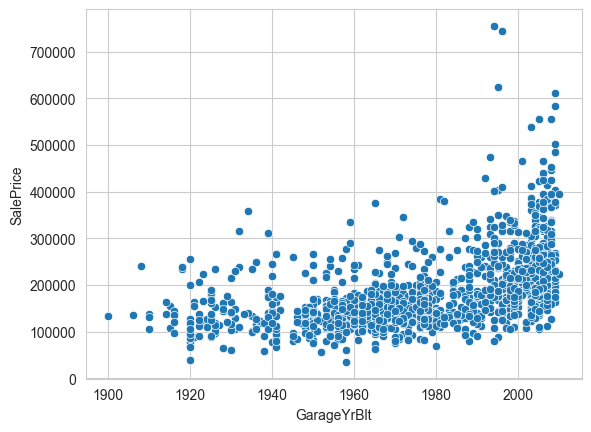

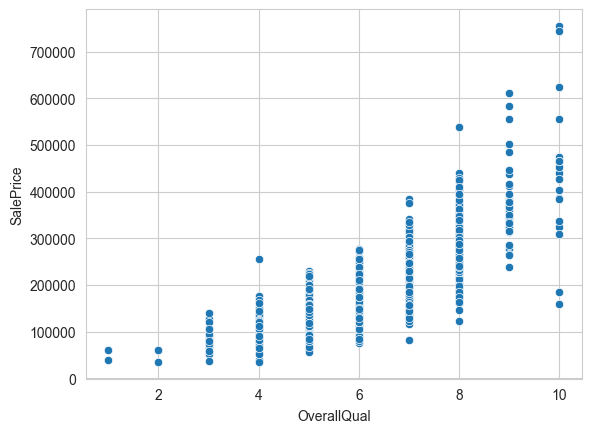

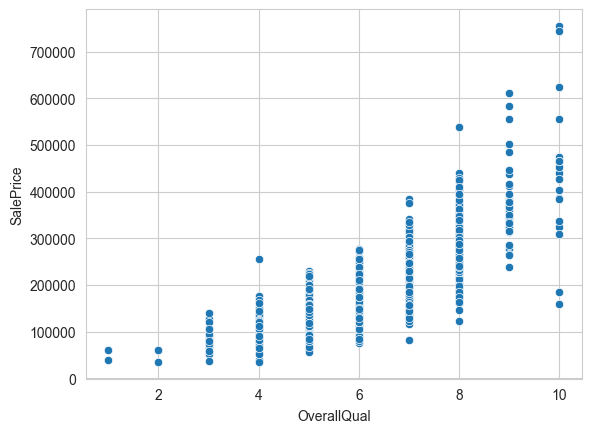

In [13]:
for col in ['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'OverallQual', 'OverallQual']:
  sns.scatterplot(data=df,  x=col, y='SalePrice')
  plt.show()
  print("\n")

## Spearman

In [14]:
df_corr_spearman = df.corr(method='spearman')
df_corr_spearman

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/159135439.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_spearman = df.corr(method='spearman')


1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  \
1stFlrSF       1.000000 -0.272301      0.145076    0.323478   0.223652   
2ndFlrSF      -0.272301  1.000000      0.504259   -0.186244   0.060025   
BedroomAbvGr   0.145076  0.504259      1.000000   -0.074509   0.142814   
BsmtFinSF1     0.323478 -0.186244     -0.074509    1.000000  -0.573638   
BsmtUnfSF      0.223652  0.060025      0.142814   -0.573638   1.000000   
EnclosedPorch -0.109353  0.096747      0.150385   -0.091032  -0.108812   
GarageArea     0.489797  0.099179      0.106361    0.244161   0.109167   
GarageYrBlt    0.230299  0.072079     -0.046842    0.078935   0.192027   
GrLivArea      0.494421  0.646578      0.542192    0.057471   0.253340   
LotArea        0.443858  0.128308      0.321834    0.171995   0.077830   
LotFrontage    0.427678  0.055850      0.321676    0.154014   0.119436   
MasVnrArea     0.352351  0.062431      0.126698    0.241565   0.075561   
OpenPorchSF    0.234713  0.230312      0.100973    0.081420   0.156127   
OverallCond   -0.166686 -0.002648     -0.003211   -0.011087  -0.128270   
OverallQual    0.408730  0.289419      0.113936    0.132957   0.272939   
TotalBsmtSF    0.829292 -0.279491      0.058357    0.410413   0.328855   
WoodDeckSF     0.178713 -0.071882     -0.000395    0.238849  -0.119388   
YearBuilt      0.293363  0.033719     -0.030635    0.189645   0.139014   
YearRemodAdd   0.240265  0.072263     -0.046806    0.063353   0.176921   
SalePrice      0.575408  0.298809      0.229527    0.301871   0.185197   

               EnclosedPorch  GarageArea  GarageYrBlt  GrLivArea   LotArea  \
1stFlrSF           -0.109353    0.489797     0.230299   0.494421  0.443858   
2ndFlrSF            0.096747    0.099179     0.072079   0.646578  0.128308   
BedroomAbvGr        0.150385    0.106361    -0.046842   0.542192  0.321834   
BsmtFinSF1         -0.091032    0.244161     0.078935   0.057471  0.171995   
BsmtUnfSF          -0.108812    0.109167     0.192027   0.253340  0.077830   
EnclosedPorch       1.000000   -0.092307    -0.307084  -0.000796 -0.004242   
GarageArea         -0.092307    1.000000     0.591889   0.468211  0.367153   
GarageYrBlt        -0.307084    0.591889     1.000000   0.281306  0.041796   
GrLivArea          -0.000796    0.468211     0.281306   1.000000  0.449040   
LotArea            -0.004242    0.367153     0.041796   0.449040  1.000000   
LotFrontage        -0.007836    0.378052     0.115694   0.375844  0.649633   
MasVnrArea         -0.194700    0.364755     0.305964   0.322678  0.177539   
OpenPorchSF        -0.187271    0.338430     0.394185   0.398312  0.176965   
OverallCond        -0.026860   -0.200718    -0.379398  -0.153720 -0.046912   
OverallQual        -0.252172    0.541552     0.618193   0.603262  0.233303   
TotalBsmtSF        -0.239024    0.486685     0.338224   0.371026  0.366197   
WoodDeckSF         -0.242565    0.127398     0.307675   0.053013  0.023925   
YearBuilt          -0.384835    0.528281     0.890546   0.288493  0.103385   
YearRemodAdd       -0.244562    0.398267     0.722377   0.282400  0.075158   
SalePrice          -0.215010    0.649379     0.593788   0.731310  0.456461   

               LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
1stFlrSF          0.427678    0.352351     0.234713    -0.166686     0.408730   
2ndFlrSF          0.055850    0.062431     0.230312    -0.002648     0.289419   
BedroomAbvGr      0.321676    0.126698     0.100973    -0.003211     0.113936   
BsmtFinSF1        0.154014    0.241565     0.081420    -0.011087     0.132957   
BsmtUnfSF         0.119436    0.075561     0.156127    -0.128270     0.272939   
EnclosedPorch    -0.007836   -0.194700    -0.187271    -0.026860    -0.252172   
GarageArea        0.378052    0.364755     0.338430    -0.200718     0.541552   
GarageYrBlt       0.115694    0.305964     0.394185    -0.379398     0.618193   
GrLivArea         0.375844    0.322678     0.398312    -0.153720     0.603262   
LotArea    

Heatmap with Threshold 0.6

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/1162136471.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data, dtype=np.bool)


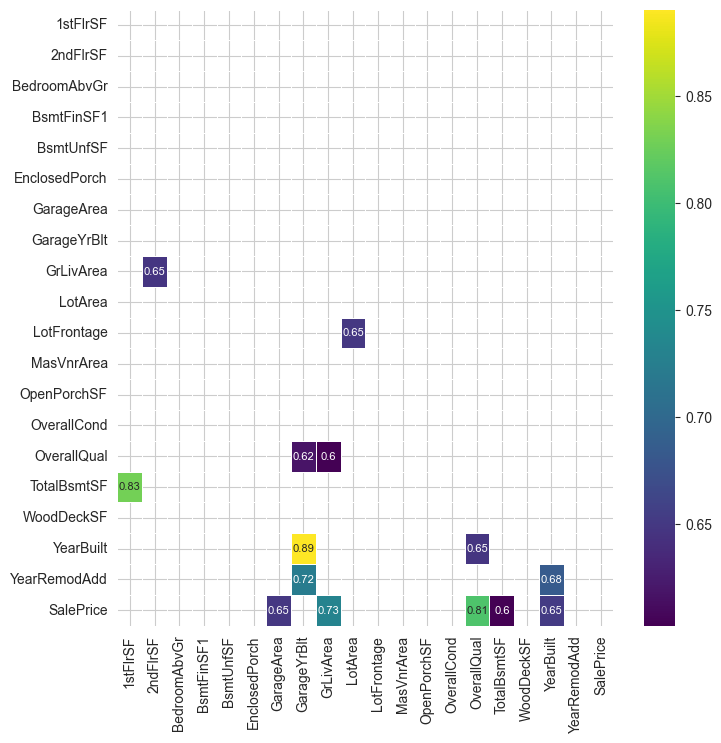

In [15]:
heatmap_corr(data= df_corr_spearman, threshold=0.6)

Corr Overview

In [16]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/1835576946.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)


OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64

In [17]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/819116545.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)


OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

In [18]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

In [19]:
vars_to_study = ['1stFlrSF', 'GarageArea', 'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

# Predictive Power Scores

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import ppscore as pps

Calculate PPS

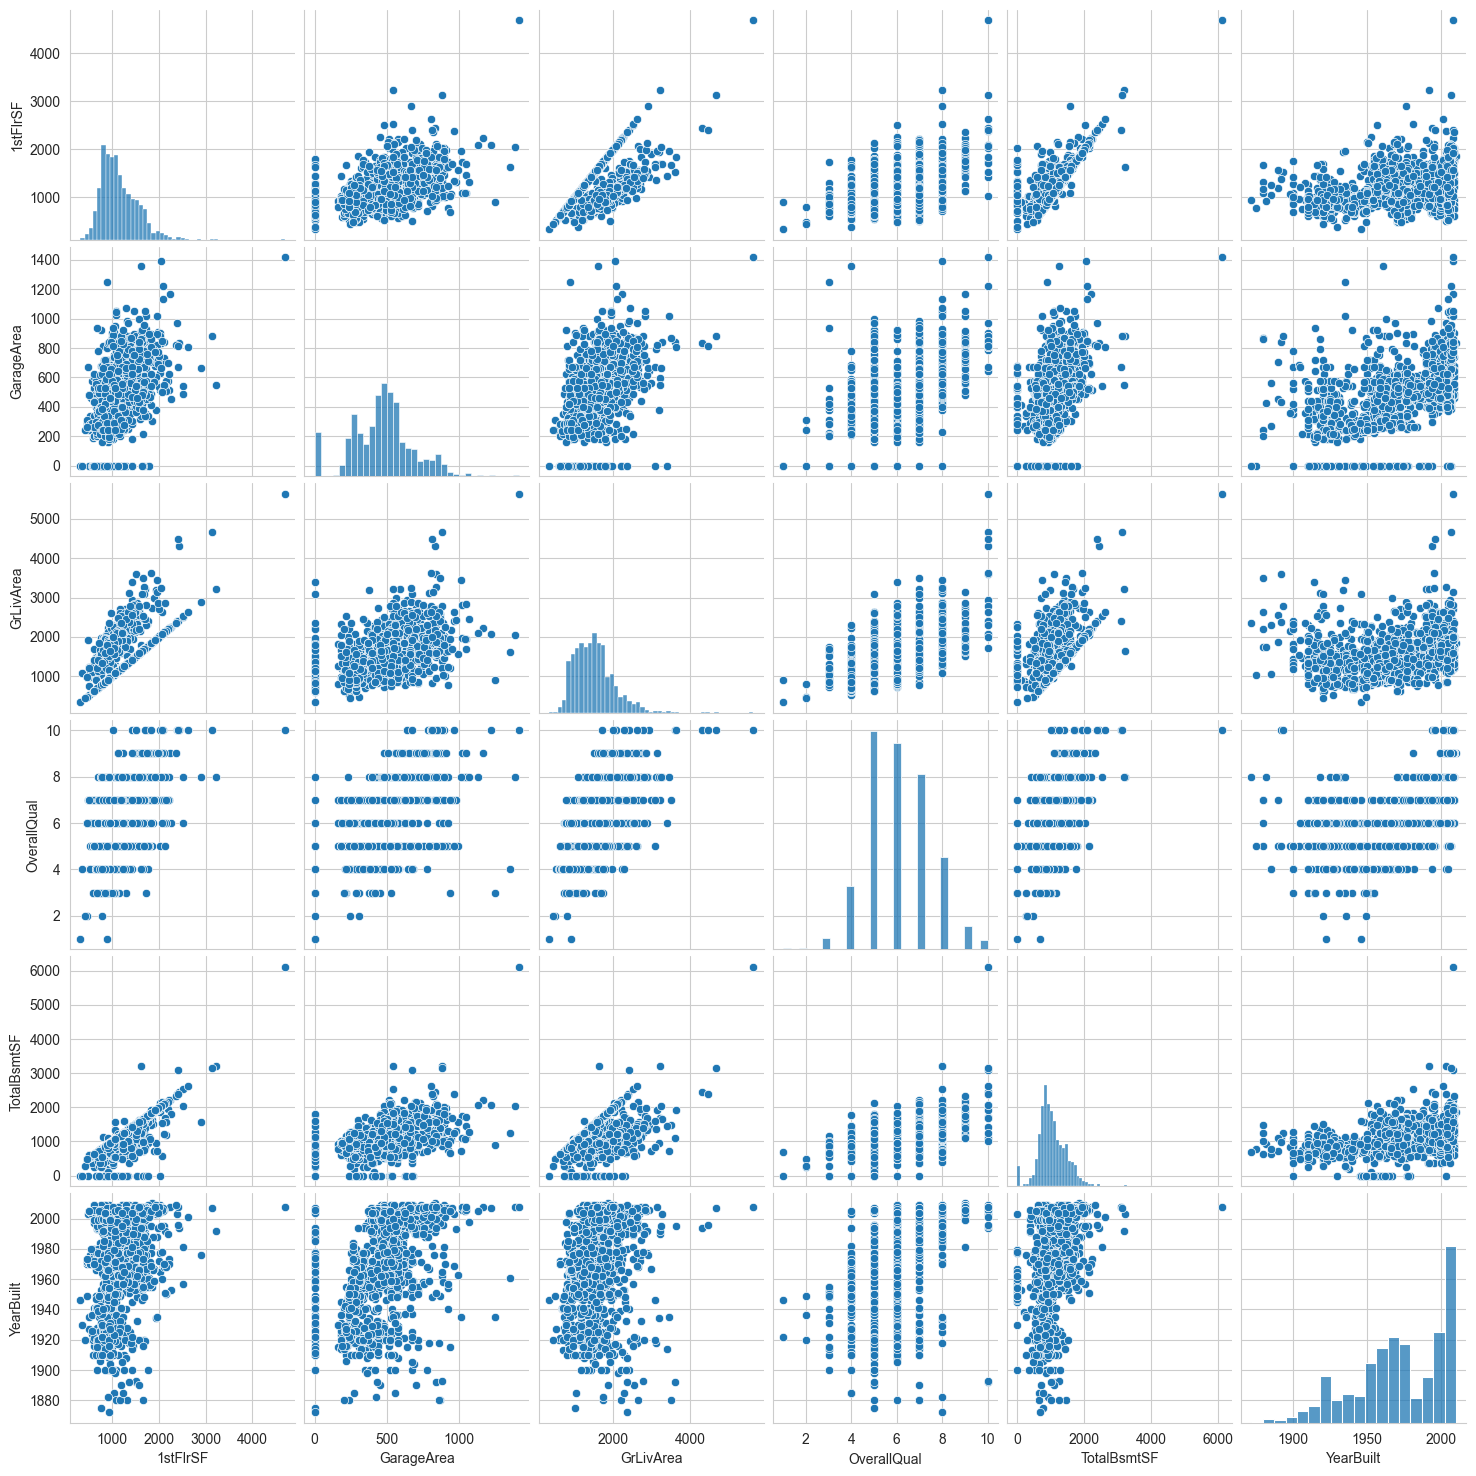

In [21]:
df_selected = df[vars_to_study]
sns.pairplot(data=df_selected)

PPS Matrix

In [22]:
pps.matrix(df=df_selected)

x            y   ppscore            case  is_valid_score  \
0      1stFlrSF     1stFlrSF  1.000000  predict_itself            True   
1      1stFlrSF   GarageArea  0.000000      regression            True   
2      1stFlrSF    GrLivArea  0.056844      regression            True   
3      1stFlrSF  OverallQual  0.000000      regression            True   
4      1stFlrSF  TotalBsmtSF  0.437103      regression            True   
5      1stFlrSF    YearBuilt  0.000000      regression            True   
6    GarageArea     1stFlrSF  0.027990      regression            True   
7    GarageArea   GarageArea  1.000000  predict_itself            True   
8    GarageArea    GrLivArea  0.034742      regression            True   
9    GarageArea  OverallQual  0.136022      regression            True   
10   GarageArea  TotalBsmtSF  0.017669      regression            True   
11   GarageArea    YearBuilt  0.215472      regression            True   
12    GrLivArea     1stFlrSF  0.102077      regression            True   
13    GrLivArea   GarageArea  0.000000      regression            True   
14    GrLivArea    GrLivArea  1.000000  predict_itself            True   
15    GrLivArea  OverallQual  0.019643      regression            True   
16    GrLivArea  TotalBsmtSF  0.000000      regression            True   
17    GrLivArea    YearBuilt  0.000000      regression            True   
18  OverallQual     1stFlrSF  0.139384      regression            True   
19  OverallQual   GarageArea  0.176314      regression            True   
20  OverallQual    GrLivArea  0.189052      regression            True   
21  OverallQual  OverallQual  1.000000  predict_itself            True   
22  OverallQual  TotalBsmtSF  0.153661      regression            True   
23  OverallQual    YearBuilt  0.282367      regression            True   
24  TotalBsmtSF     1stFlrSF  0.578866      regression            True   
25  TotalBsmtSF   GarageArea  0.000000      regression            True   
26  TotalBsmtSF    GrLivArea  0.002524      regression            True   
27  TotalBsmtSF  OverallQual  0.050124      regression            True   
28  TotalBsmtSF  TotalBsmtSF  1.000000  predict_itself            True   
29  TotalBsmtSF    YearBuilt  0.000000      regression            True   
30    YearBuilt     1stFlrSF  0.072221      regression            True   
31    YearBuilt   GarageArea  0.108678      regression            True   
32    YearBuilt    GrLivArea  0.060807      regression            True   
33    YearBuilt  OverallQual  0.278965      regression            True   
34    YearBuilt  TotalBsmtSF  0.099232      regression            True   
35    YearBuilt    YearBuilt  1.000000  predict_itself            True   

                 metric  baseline_score  model_score                    model  
0                  None        0.000000     1.000000                     None  
1   mean absolute error      159.933562   187.918545  DecisionTreeRegressor()  
2   mean absolute error      394.532192   372.105375  DecisionTreeRegressor()  
3   mean absolute error        1.073288     1.129780  DecisionTreeRegressor()  
4   mean absolute error      317.032192   178.456529  DecisionTreeRegressor()  
5   mean absolute error       25.041781    27.663340  DecisionTreeRegressor()  
6   mean absolute error      294.177397   285.943460  DecisionTreeRegressor()  
7                  None        0.000000     1.000000                     None  
8   mean absolute error      394.532192   380.825441  DecisionTreeRegressor()  
9   mean absolute error        1.073288     0.927296  DecisionTreeRegressor()  
10  mean absolute error      317.032192   311.430525  DecisionTreeRegressor()  
11  mean absolute error       25.041781    19.645972  DecisionTreeRegressor()  
12  mean absolute error      294.177397   264.148612  DecisionTreeRegressor()  
13  mean absolute error      159.933562   176.957667  DecisionTreeRegressor()  
14                 None        0.000000     1.000000                     No

In [23]:
pps_matrix_raw = pps.matrix(df_selected)
pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')
pps_matrix

x            1stFlrSF  GarageArea  GrLivArea  OverallQual  TotalBsmtSF  \
y                                                                        
1stFlrSF     1.000000    0.027990   0.102077     0.139384     0.578866   
GarageArea   0.000000    1.000000   0.000000     0.176314     0.000000   
GrLivArea    0.056844    0.034742   1.000000     0.189052     0.002524   
OverallQual  0.000000    0.136022   0.019643     1.000000     0.050124   
TotalBsmtSF  0.437103    0.017669   0.000000     0.153661     1.000000   
YearBuilt    0.000000    0.215472   0.000000     0.282367     0.000000   

x            YearBuilt  
y                       
1stFlrSF      0.072221  
GarageArea    0.108678  
GrLivArea     0.060807  
OverallQual   0.278965  
TotalBsmtSF   0.099232  
YearBuilt     1.000000

In [24]:
def heatmap_pps(df,threshold, figsize=(8,8), font_annot = 10):
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=np.bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, annot_kws={"size": font_annot},
                       mask=mask,cmap='rocket_r', linewidth=0.05,
                       linecolor='lightgrey')
      
      plt.ylim(len(df.columns),0)
      plt.show()

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/2297462975.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


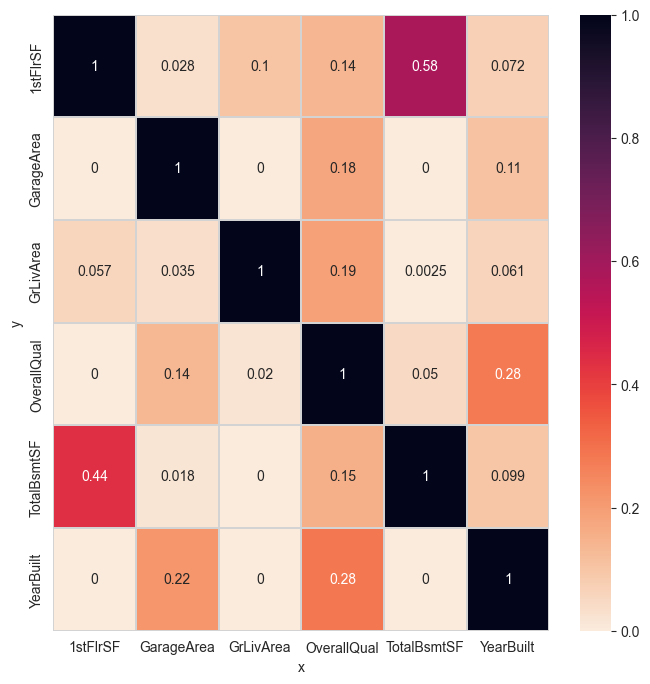

In [25]:
heatmap_pps(df=pps_matrix, threshold=0)

In [26]:
pps_matrix_raw

x            y   ppscore            case  is_valid_score  \
0      1stFlrSF     1stFlrSF  1.000000  predict_itself            True   
1      1stFlrSF   GarageArea  0.000000      regression            True   
2      1stFlrSF    GrLivArea  0.056844      regression            True   
3      1stFlrSF  OverallQual  0.000000      regression            True   
4      1stFlrSF  TotalBsmtSF  0.437103      regression            True   
5      1stFlrSF    YearBuilt  0.000000      regression            True   
6    GarageArea     1stFlrSF  0.027990      regression            True   
7    GarageArea   GarageArea  1.000000  predict_itself            True   
8    GarageArea    GrLivArea  0.034742      regression            True   
9    GarageArea  OverallQual  0.136022      regression            True   
10   GarageArea  TotalBsmtSF  0.017669      regression            True   
11   GarageArea    YearBuilt  0.215472      regression            True   
12    GrLivArea     1stFlrSF  0.102077      regression            True   
13    GrLivArea   GarageArea  0.000000      regression            True   
14    GrLivArea    GrLivArea  1.000000  predict_itself            True   
15    GrLivArea  OverallQual  0.019643      regression            True   
16    GrLivArea  TotalBsmtSF  0.000000      regression            True   
17    GrLivArea    YearBuilt  0.000000      regression            True   
18  OverallQual     1stFlrSF  0.139384      regression            True   
19  OverallQual   GarageArea  0.176314      regression            True   
20  OverallQual    GrLivArea  0.189052      regression            True   
21  OverallQual  OverallQual  1.000000  predict_itself            True   
22  OverallQual  TotalBsmtSF  0.153661      regression            True   
23  OverallQual    YearBuilt  0.282367      regression            True   
24  TotalBsmtSF     1stFlrSF  0.578866      regression            True   
25  TotalBsmtSF   GarageArea  0.000000      regression            True   
26  TotalBsmtSF    GrLivArea  0.002524      regression            True   
27  TotalBsmtSF  OverallQual  0.050124      regression            True   
28  TotalBsmtSF  TotalBsmtSF  1.000000  predict_itself            True   
29  TotalBsmtSF    YearBuilt  0.000000      regression            True   
30    YearBuilt     1stFlrSF  0.072221      regression            True   
31    YearBuilt   GarageArea  0.108678      regression            True   
32    YearBuilt    GrLivArea  0.060807      regression            True   
33    YearBuilt  OverallQual  0.278965      regression            True   
34    YearBuilt  TotalBsmtSF  0.099232      regression            True   
35    YearBuilt    YearBuilt  1.000000  predict_itself            True   

                 metric  baseline_score  model_score                    model  
0                  None        0.000000     1.000000                     None  
1   mean absolute error      159.933562   187.918545  DecisionTreeRegressor()  
2   mean absolute error      394.532192   372.105375  DecisionTreeRegressor()  
3   mean absolute error        1.073288     1.129780  DecisionTreeRegressor()  
4   mean absolute error      317.032192   178.456529  DecisionTreeRegressor()  
5   mean absolute error       25.041781    27.663340  DecisionTreeRegressor()  
6   mean absolute error      294.177397   285.943460  DecisionTreeRegressor()  
7                  None        0.000000     1.000000                     None  
8   mean absolute error      394.532192   380.825441  DecisionTreeRegressor()  
9   mean absolute error        1.073288     0.927296  DecisionTreeRegressor()  
10  mean absolute error      317.032192   311.430525  DecisionTreeRegressor()  
11  mean absolute error       25.041781    19.645972  DecisionTreeRegressor()  
12  mean absolute error      294.177397   264.148612  DecisionTreeRegressor()  
13  mean absolute error      159.933562   176.957667  DecisionTreeRegressor()  
14                 None        0.000000     1.000000                     No

In [27]:
pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T

count      mean      std  min       25%       50%       75%       max
ppscore   30.0  0.107992  0.13872  0.0  0.000631  0.058825  0.150092  0.578866

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/2297462975.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


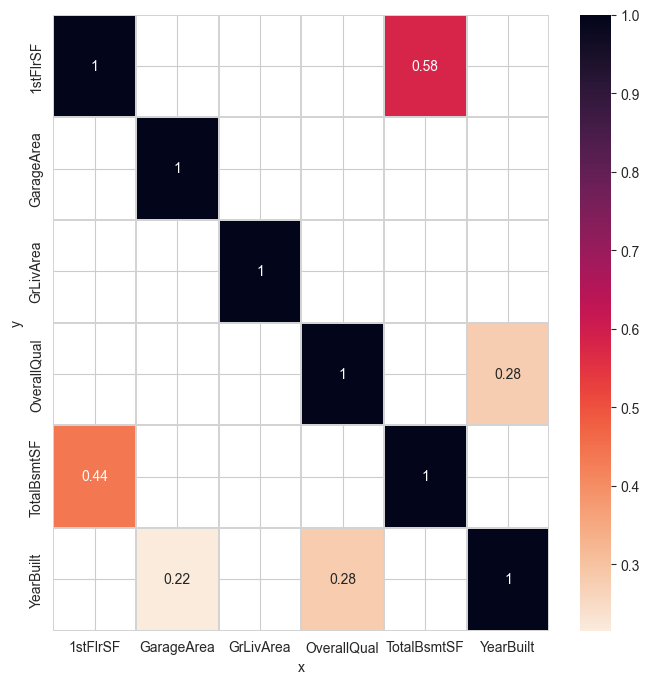

In [28]:
heatmap_pps(df=pps_matrix, threshold=0.19)

# Combine Corr and PPS

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

def heatmap_corr(df,threshold, figsize=(20,12), font_annot = 8):
  if len(df.columns) > 1:
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(df) < threshold] = True

    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                linewidth=0.5
                     )
    axes.set_yticklabels(df.columns, rotation = 0)
    plt.ylim(len(df.columns),0)
    plt.show()


def heatmap_pps(df,threshold, figsize=(20,12), font_annot = 8):
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=np.bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, xticklabels=True,yticklabels=True,
                       mask=mask,cmap='rocket_r', annot_kws={"size": font_annot},
                       linewidth=0.05,linecolor='grey')
      
      plt.ylim(len(df.columns),0)
      plt.show()



def CalculateCorrAndPPS(df):
  df_corr_spearman = df.corr(method="spearman")
  df_corr_pearson = df.corr(method="pearson")

  pps_matrix_raw = pps.matrix(df)
  pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

  pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
  print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
  print(pps_score_stats.round(3))

  return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix,CorrThreshold,PPS_Threshold,
                      figsize=(20,12), font_annot=8 ):

  print("\n")
  print("* Analyze how the target variable for your ML models are correlated with other variables (features and target)")
  print("* Analyze multi colinearity, that is, how the features are correlated among themselves")

  print("\n")
  print("*** Heatmap: Spearman Correlation ***")
  print("It evaluates monotonic relationship \n")
  heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Pearson Correlation ***")
  print("It evaluates the linear relationship between two continuous variables \n")
  heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Predictive power Score (PPS) ***")
  print(f"PPS detects linear or non-linear relationships between two columns.\n"
        f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
  heatmap_pps(df=pps_matrix,threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [30]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/768671258.py:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_spearman = df.corr(method="spearman")
/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/768671258.py:40: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_pearson = df.corr(method="pearson")
/opt/homebrew/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated c

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  552.0  0.055  0.104  0.0  0.0  0.0  0.066  0.702




* Analyze how the target variable for your ML models are correlated with other variables (features and target)
* Analyze multi colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/768671258.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


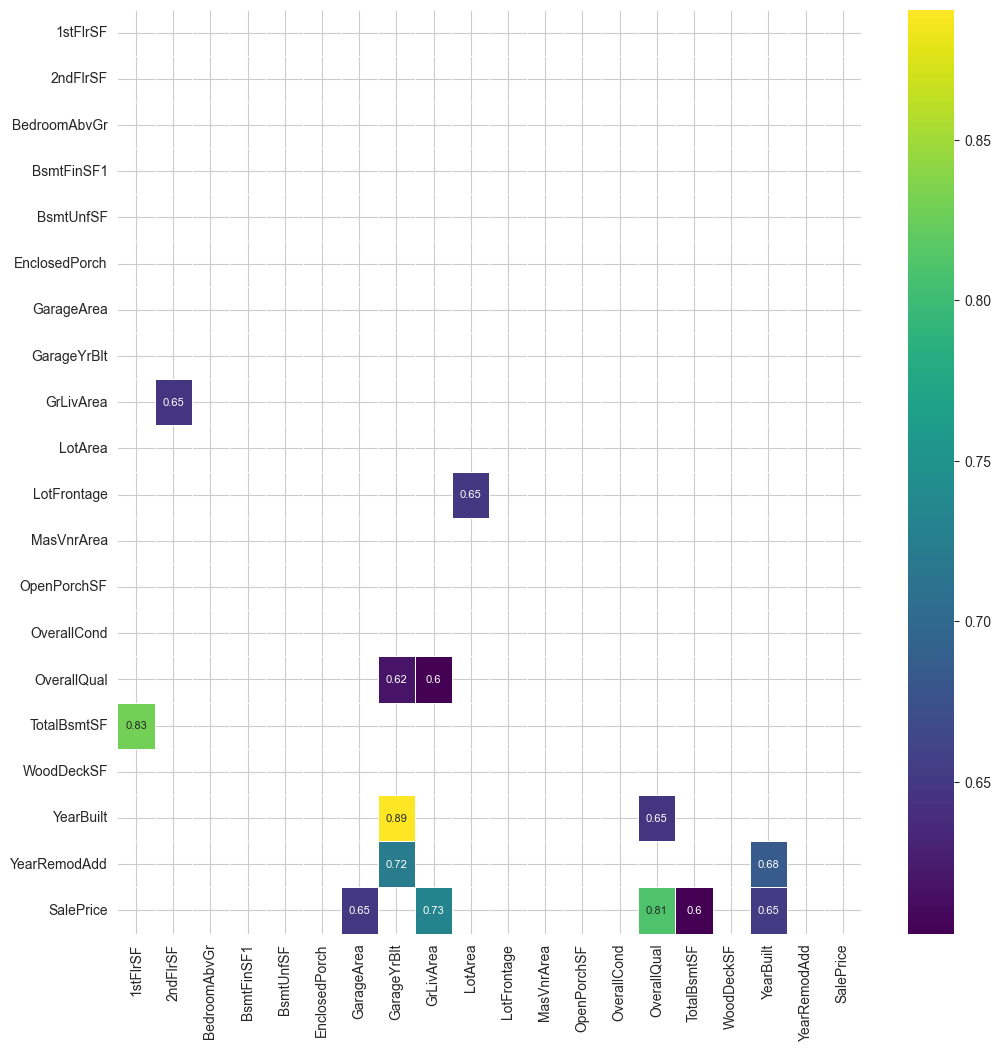



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



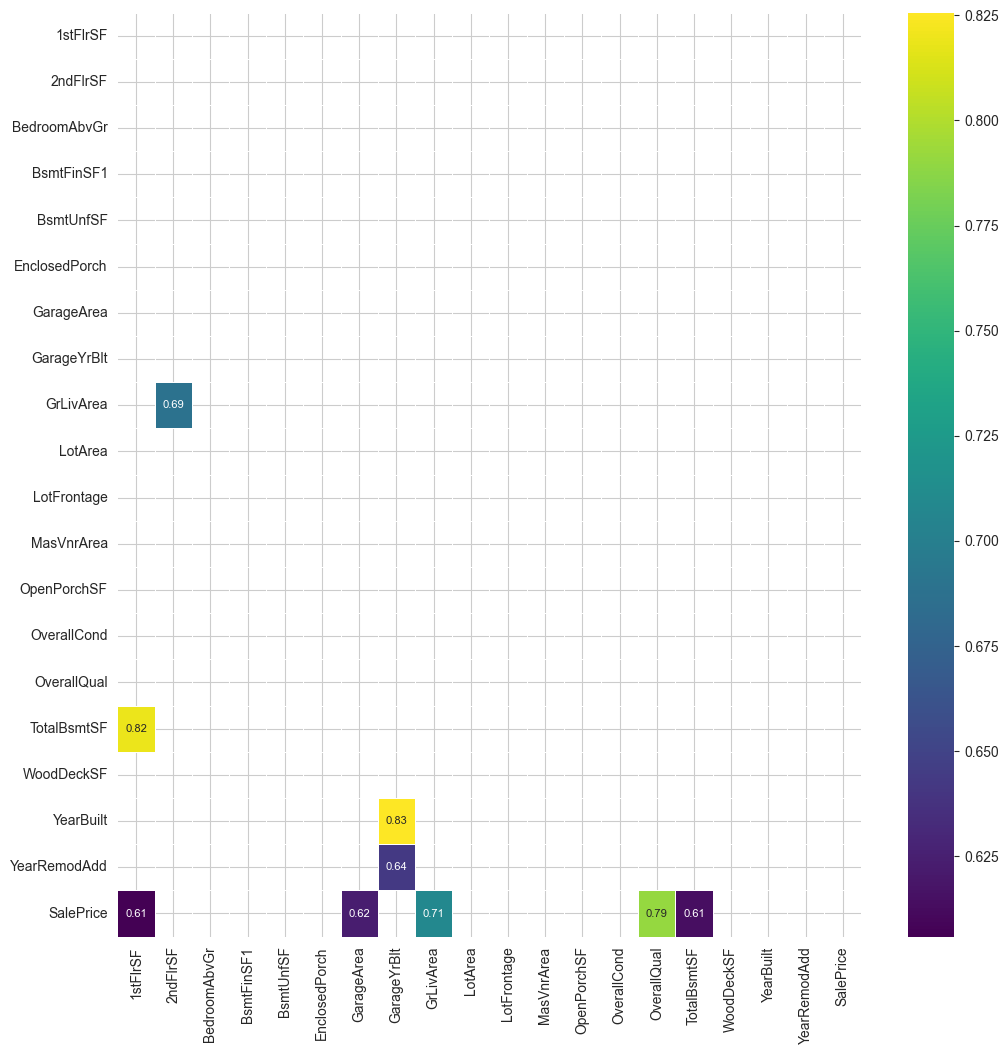



*** Heatmap: Predictive power Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



/var/folders/vg/xr2t0ncx7c98wfntvs622gs80000gn/T/ipykernel_75090/768671258.py:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


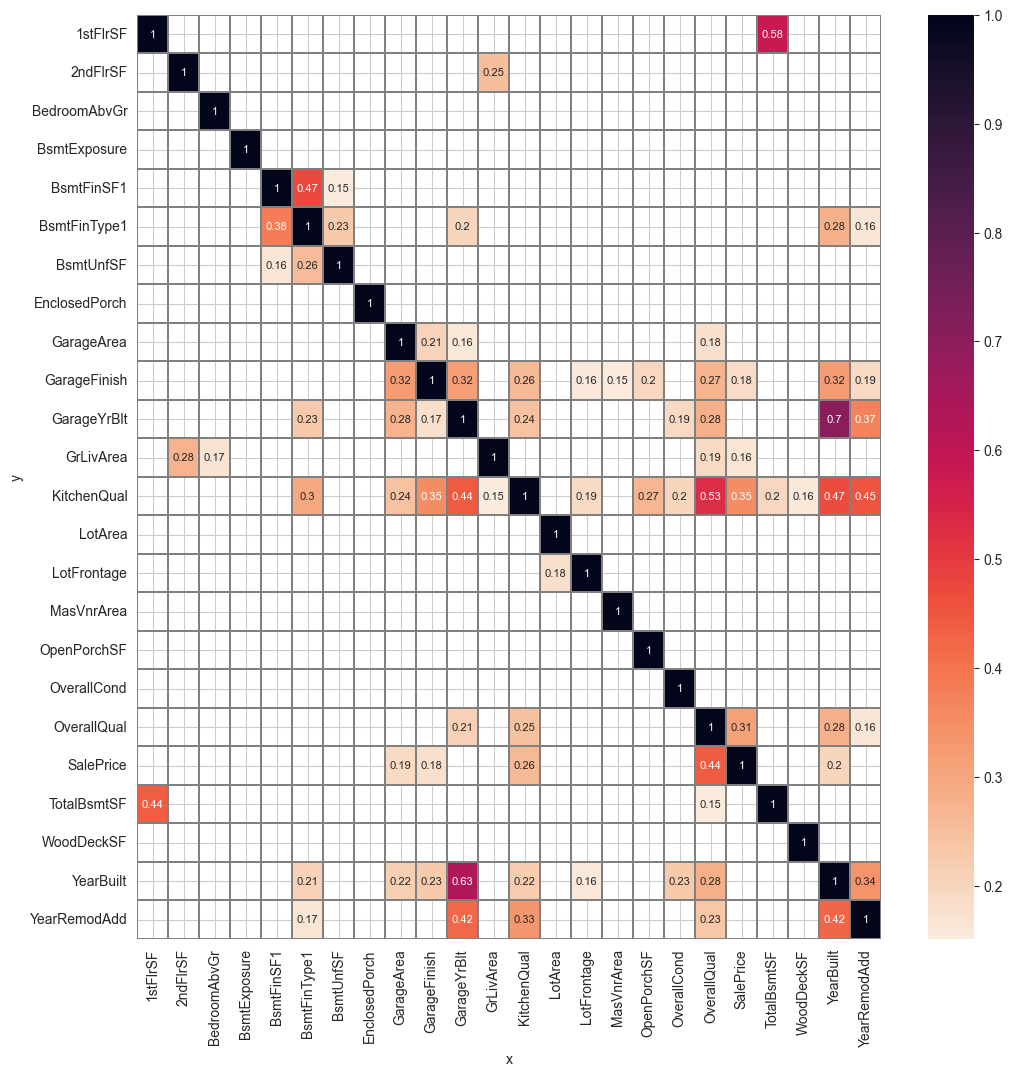

In [31]:
DisplayCorrAndPPS(df_corr_pearson=df_corr_pearson,
                  df_corr_spearman=df_corr_spearman, 
                  pps_matrix=pps_matrix,
                  CorrThreshold=0.6, PPS_Threshold=0.15,
                  figsize=(12,12), font_annot=8)

---